# Classification Engine between Dogs & Cats

In [1]:
import numpy as np
import pandas as pd

from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

Using TensorFlow backend.
C:\Users\iiats\Anaconda3\envs\Python36-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\iiats\Anaconda3\envs\Python36-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\iiats\Anaconda3\envs\Python36-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\iiats\Anaconda3\e

In [2]:
import keras
keras.__version__

'2.2.4'

In [3]:
import tensorflow
tensorflow.__version__

'1.14.0'

In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4102640709467947200,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4862417305
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2132413595702758724
 physical_device_desc: "device: 0, name: GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"]

In [5]:
FAST_RUN = False
IMAGE_WIDTH=224
IMAGE_HEIGHT=224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

### VGG16 のダウンロード

In [7]:
# from keras.applications.vgg16 import VGG16
# vggmodel = VGG16(weights='imagenet', include_top=True)
# vggmodel.summary()







_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
____

### VGG-16 をベースにモデルを作成

In [8]:
# for layers in (vggmodel.layers)[:19]:
#     print(layers)
#     layers.trainable = False

In [9]:
# X= vggmodel.layers[-2].output
# predictions = Dense(2, activation="softmax")(X)
# model = Model(input = vggmodel.input, output = predictions)
# model.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
# model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________

C:\Users\iiats\Anaconda3\envs\Python36-gpu\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  This is separate from the ipykernel package so we can avoid doing imports until


### 学習済のモデルの重みを取得

In [6]:
# model.load_weights('vgg16_1.h5')

In [7]:
# model

### 保存ずみモデルの取得

In [7]:
from tensorflow.keras.models import load_model
model = load_model('vgg16_model.h5')

### 予測

In [8]:
filenames = os.listdir("./test2")

sample = random.choice(filenames)
img = load_img("./test2/"+sample, target_size=IMAGE_SIZE)
img_org = img

In [9]:
img = np.asarray(img)
img = np.expand_dims(img, axis=0)

In [10]:
predict = model.predict(img)
predict

array([[0.00190667, 0.9980933 ]], dtype=float32)

In [11]:
# predict.round()

この画像は犬です


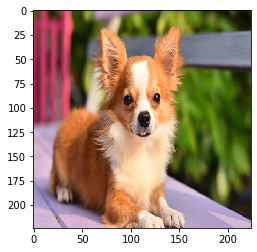

In [12]:
plt.imshow(img_org)

if predict[0][0] > predict[0][1]:
        print("この画像はネコです")
else:
        print('この画像は犬です')

### 予測の関数化

In [13]:
def Predict_Dogs_Cats():
    filenames = os.listdir("./test2")
    sample = random.choice(filenames)
    img = load_img("./test2/"+sample, target_size=IMAGE_SIZE)
    img_org = img
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    predict = model.predict(img)
    plt.imshow(img_org)

    if predict[0][0] > predict[0][1]:
            print("この画像はネコです")
    else:
            print('この画像は犬です')

この画像は犬です


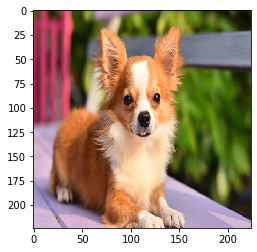

In [14]:
Predict_Dogs_Cats()